**Denise Dodd:
Predicting Attrition - Coding**

# **Table of Contents**

[Load Data and Modules](#Loading)

[Review Data](#Review_Data)

[Prepare for Regression](#Prepare)

[Regression Selection](#Select)

[Hyper-Parameters](#Params)

[Decision Tree Classifier](#DecisionTree)

[Visualizations](#Visualizations)

[Questions](#Questions)

[Resources](#Resources)

<span style="font-size: 18px; font-weight: bold;">Load Data and Modules</span><a id="Loading"></a>

In [1]:
# Import needed modules.
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import precision_recall_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set directory and load data.
os.chdir('C:/Users/hadle/Downloads')
df = pd.read_csv('general_data.csv')

# Check for accuracy
current_shape = df.shape
print(f"The current shape of the dataframe is {current_shape}.")
df.head(5)

The current shape of the dataframe is (4410, 24).


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


<span style="font-size: 18px; font-weight: bold;">Review and Clean Data</span><a id="Review_Data"></a>

Review the data type for each column.

In [3]:
# Find the data type for each column.
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

---------
Review for nulls.

In [4]:
# Add together the number of nulls in each column.
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [5]:
# Change null values in 'NumCompaniesWorked' and 'TotalWorkingYears' columns to 0.
# If this is an employee's first job, it makes sense for these null values to be 0.
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(0)
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(0)

# Check the number of nulls in each col once more for accuracy.
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

---------
Review distribution of numerical columns.

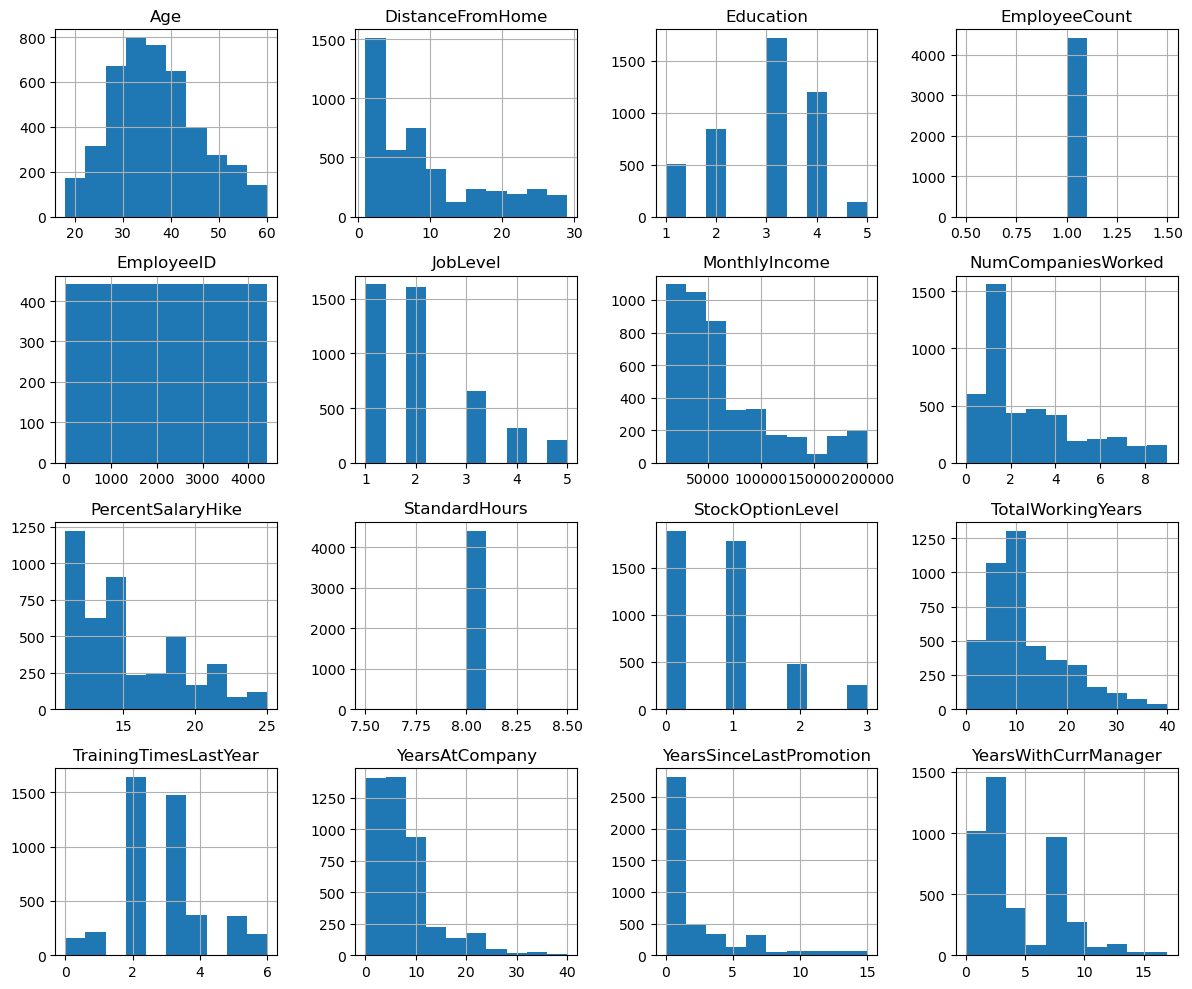

In [6]:
# Isolate numerical columns.
numerical_columns = df.select_dtypes(include='number')

# Create and display histograms for numerical columns.
# Adjust layout for ease of viewing.
numerical_columns.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

---------
Review distribution of categorical columns.

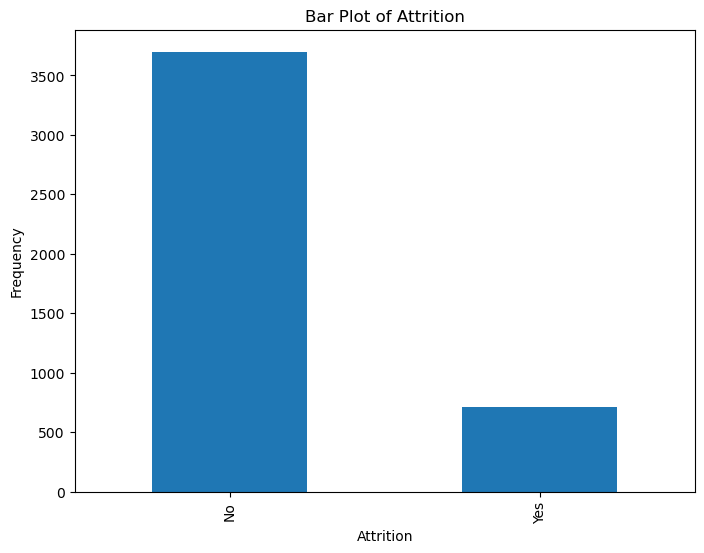

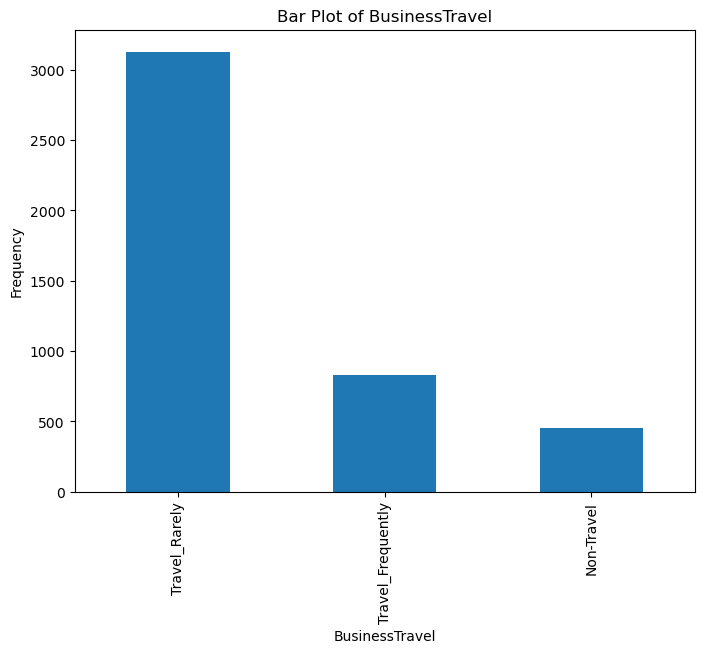

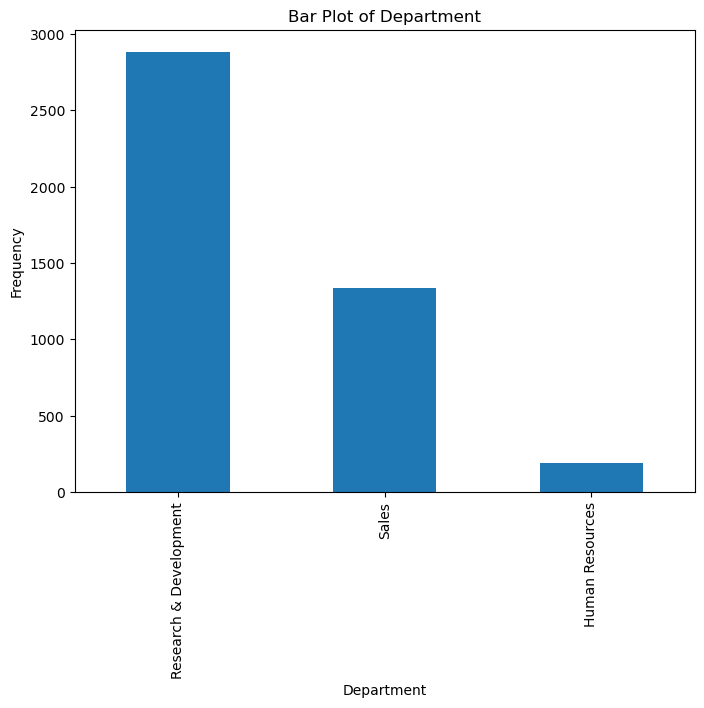

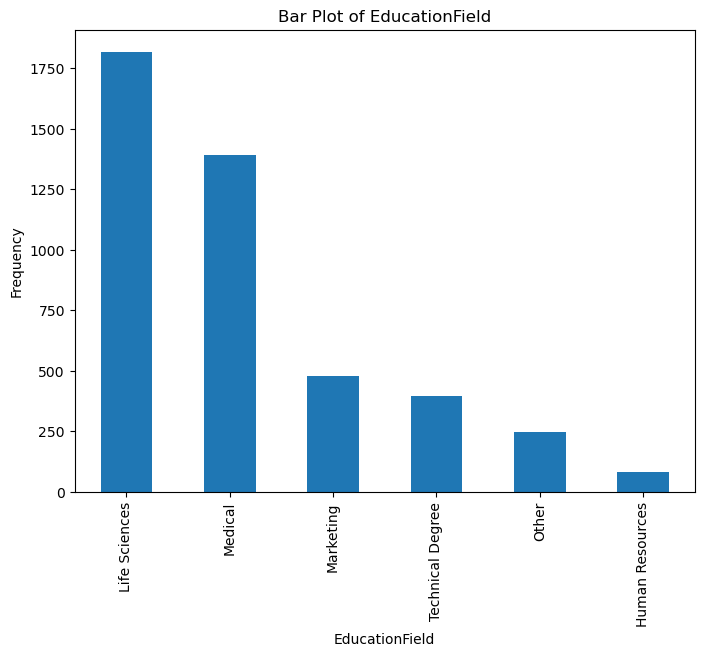

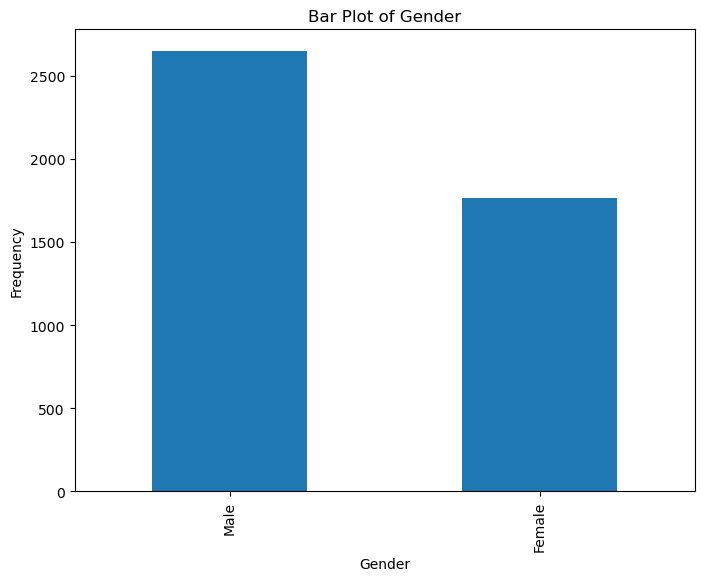

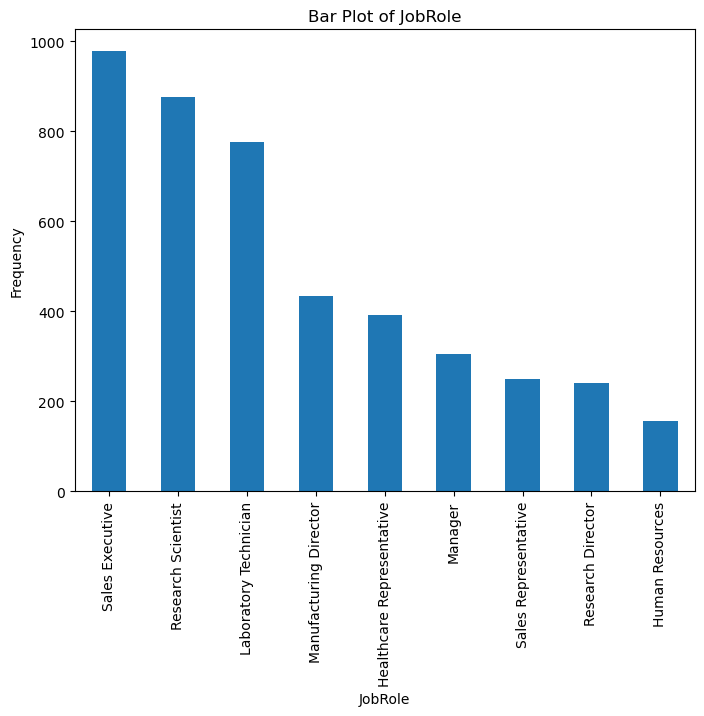

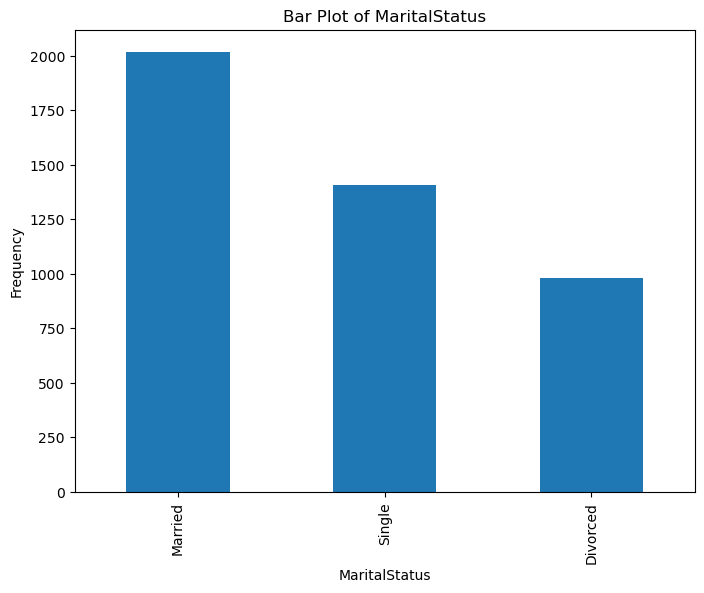

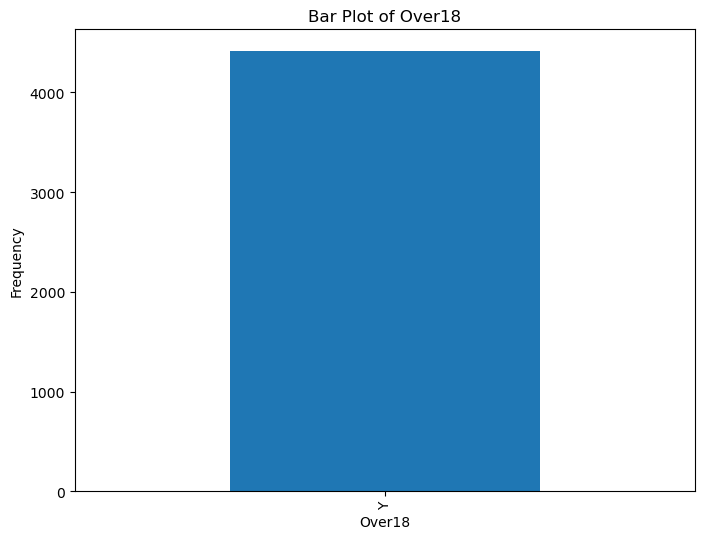

In [7]:
# Isolate categorical columns.
categorical_columns = df.select_dtypes(include='object')

# Use loop to iterate through each categorical col.
# Count the number or each entry in each col.
# Create bar graph.
# Assign graph title and axis labels.
# Display graph.
for col in categorical_columns.columns:
        categorical_columns[col].value_counts().plot(kind='bar', figsize=(8, 6))
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Bar Plot of {col}')
        plt.show()

In [8]:
# All of the "Over18", "EmployeeCount", and "StandardHours" columns have one value for the whole column.
# This won't add anything to our study so I will delete these columns.
df.drop('Over18', axis=1, inplace=True)
df.drop('EmployeeCount', axis=1, inplace=True)
df.drop('StandardHours', axis=1, inplace=True)

# The "EmployeeID" column is a random, unique number for each employee.
# This won't add anything to our study so I will delete this column.
df.drop('EmployeeID', axis=1, inplace=True)

# Check for accuracy.
print(f"The shape of the prior dataframe was {current_shape}.")
print(f"The current shape of the dataframe is {df.shape}.")
current_shape = df.shape
df.head(5)

The shape of the prior dataframe was (4410, 24).
The current shape of the dataframe is (4410, 20).


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


<span style="font-size: 18px; font-weight: bold;">Prepare for Regression</span><a id="Prepare"></a>

In [9]:
# Isolate categorical columns. These are the columns that will require dummy variables.
dummy_cols = df.select_dtypes(include='object')

# Drop the Attrition Column.  This does not need to be a dummy variable as it will be the target variable.
dummy_cols = dummy_cols.drop("Attrition", axis=1)

# Create dummy variables of categorical columns minus Attrition.
# Use original categorical column names as prefixes for dummy variables.
# Use drop_first=True to drop the first dummy for each variable to prevent multicollinearity.
dummy_data = pd.get_dummies(dummy_cols, prefix=dummy_cols.columns, drop_first=True)

# Create dummy_df which is the original df minus the columns from which dummy variables were made.
dummy_df = df.drop(dummy_cols, axis=1)

# Concatenate (combine) original dataframe (minus categorical columns) with the categorical dummies dataframe along the columns.
dummy_df = pd.concat([dummy_df, dummy_data], axis=1)

# Check for accuracy.
print(f"The shape of the prior dataframe was {current_shape}.")
print(f"The current shape of the dataframe is {dummy_df.shape}.")
current_shape = dummy_df.shape
dummy_df.head(5)

The shape of the prior dataframe was (4410, 20).
The current shape of the dataframe is (4410, 34).


,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,No,6,2,1,131160,1.0,11,0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,31,Yes,10,1,1,41890,0.0,23,1,6.0,...,0,0,0,0,0,1,0,0,0,1
2,32,No,17,4,4,193280,1.0,15,3,5.0,...,0,0,0,0,0,0,1,0,1,0
3,38,No,2,5,3,83210,3.0,11,3,13.0,...,1,0,0,0,0,0,0,0,1,0
4,32,No,10,1,1,23420,4.0,12,2,9.0,...,0,0,0,0,0,0,1,0,0,1


In [10]:
# Review list of column names.
print(dummy_df.columns.tolist())

['Age', 'Attrition', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single']


In [11]:
# Convert "Attrition" column to a binary 1 for yes and 0 for no.
dummy_df['Attrition'] = dummy_df['Attrition'].replace({'Yes': 1, "No": 0})

In [12]:
# Assign feature and target variables.
features = dummy_df.drop('Attrition', axis=1)
target = dummy_df['Attrition']

In [13]:
# Split the variables into training and test sets using an 80/20 split
# and a random state of 42 for continuity.
features_train, features_test, target_train, target_test = \
    train_test_split(features, target, train_size=0.8, test_size=0.2,
                     random_state=0)

<span style="font-size: 18px; font-weight: bold;">Regression Selection</span><a id="Select"></a>

In [14]:
# Determine best model for data.

# Store model names and instance of models in tuple variable.
# Use random state = 42 for consistency when re-running the models.
# Selected models with the ability to work with classification and binary data.
models=[("Decision Tree", DecisionTreeClassifier(random_state=42)),
        ("K-Nearest Neighbors",KNeighborsClassifier()),
        ("Logistic Regression", LogisticRegression())]

# Use for loop to iterate through each name and model in tuple.
# Fit the models on training variables.
# Make predictions based on features_test variable.
# Print model name and metrics.
for name,model in models:
    model.fit(features_train,target_train)
    predictions = model.predict(features_test)
    print(f'Model: {name}')
    print(f'{classification_report(target_test, predictions)}\n')

Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       737
           1       0.96      1.00      0.98       145

    accuracy                           0.99       882
   macro avg       0.98      1.00      0.99       882
weighted avg       0.99      0.99      0.99       882


Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       737
           1       0.41      0.28      0.33       145

    accuracy                           0.82       882
   macro avg       0.64      0.60      0.61       882
weighted avg       0.79      0.82      0.80       882


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       737
           1       0.00      0.00      0.00       145

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       8

The above metrics indicate that the Decision Tree Classifier will be the best model for this data.

Precision: With a precision score of 1.00, all instances where the model predicted 0 (no attrition) were also a 0 in the test data. With a precision score of .96, 96% of the instances where the model predicted 1 (yes attrition) were also a 1 in the test set. (True Positives/All Predicted Positives) 

Recall: With a recall score of .99, this model correctly identified 99% of no attrition instances. With a recall score of 1.00 this model accurately identified all the yes attrition instances. (Correctly Predicted Positives/Actual Positives in Test Set) 

F1-Score: The F1-Score is an average of the precision and recall scores. 

Accuracy: With an accuracy score of .99, 99% of this model's predictions are correct. 


<span style="font-size: 18px; font-weight: bold;">Hyper-Parameters</span><a id="Params"></a>

The above metrics are SO good for the Decision Tree Classifier, I'm concerned about the possibility of multicollinearity.  I will use a grid search to find the best hyperparameters in the hopes of eliminating any potential multicollinearity.

In [15]:
# Establish the parameters to be used in grid search.
# max_depth = Determines how deep the tree should go.
# min_samples_split = Indicates the min number of samples a node must have
# in order to be split.
# min_samples_leaf = Indicates min number each node must have.
parameters = {'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# Initiate a grid search on the Decision Tree Classifier using the above parameters, 
# accuracy as the scoring metric, and 5 folds for cross validation.
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=5, scoring='accuracy')

# Fit the above grid search on the training data.
grid_search.fit(features_train, target_train)

# Print the best hyperparameters found in the above grid search.
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


<span style="font-size: 18px; font-weight: bold;">Decision Tree Classifier</span><a id="DecisionTree"></a>

In [16]:
# Initiate a decision tree classifier model outside of loop with best parameters.
hyper_dtc = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2)

# Fit the model to the training data.
hyper_dtc.fit(features_train, target_train)

# Make predictions on the test data.
predictions = hyper_dtc.predict(features_test)

# Print evaluation metrics.
print(f'{classification_report(target_test, predictions)}')

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       737
           1       0.85      0.65      0.73       145

    accuracy                           0.92       882
   macro avg       0.89      0.81      0.84       882
weighted avg       0.92      0.92      0.92       882



This Accuracy score shows that the Hyper-tuned Decision Tree Classifier correctly classified 92% of the attrition entries.  This is lower than the 99% accuracy found in the original Decision Tree Classifier, but it is still higher than the accuracy calculations for the K-Nearest Neighbor and Logistic Regression models. This has alleviated my concern of multicollinearity.  I will move forward with the Hyper-Tuned Decision Tree Classifier.

<span style="font-size: 18px; font-weight: bold;">Visualizations</span><a id="Visualizations"></a>

<span style="font-size: 15px; font-weight: bold;">Confusion Matrix</span><a id="Q1"></a>

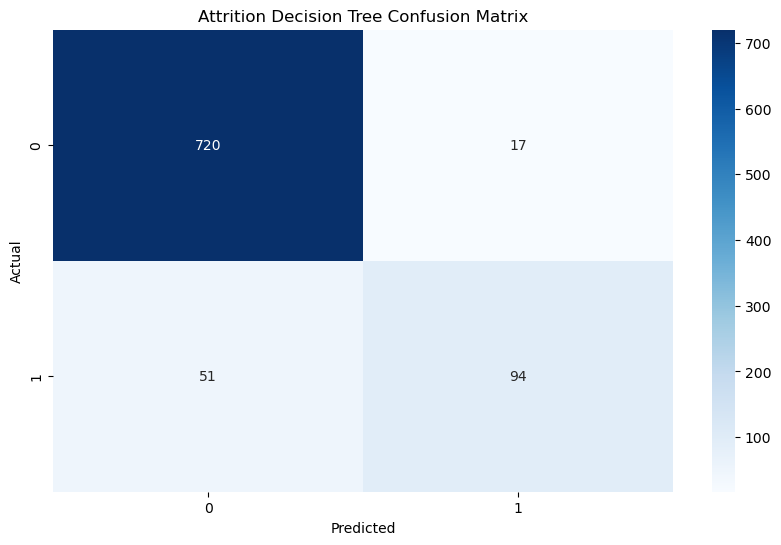

In [17]:
# Calculate and display heatmap of confusion matrix of the Decision Tree Classifier.
# Annotate the matrix and adjust color as original matrix was very dark.
# Assign graph title and axis labels.
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(target_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Attrition Decision Tree Confusion Matrix')
plt.show()

This confusion matrix shows that the Decision Tree classified:

722 of the employees who did not attrite correctly. (TP)

94 of the employees who did attrite correctly (TN)

15 of the employees who did not attrite incorrectly (FP)

51 of the employees who did attrite incorrectly (FN)


<span style="font-size: 15px; font-weight: bold;">Percision-Recall Curve</span><a id="Q1"></a>

"Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance" (Brownlee, 2023).

In [18]:
# Count the number of "Yes" and "No" entries in the "Attrition" column
attrition_counts = df['Attrition'].value_counts()

# Print the counts
print("Number of 'Yes' entries:", attrition_counts['Yes'])
print("Number of 'No' entries:", attrition_counts['No'])


Number of 'Yes' entries: 711
Number of 'No' entries: 3699


Because there is an imbalance in the number of "Yes" and "No" observations, I will use a Precision-Recall curve to evaluate how well my model classified attrition entries.

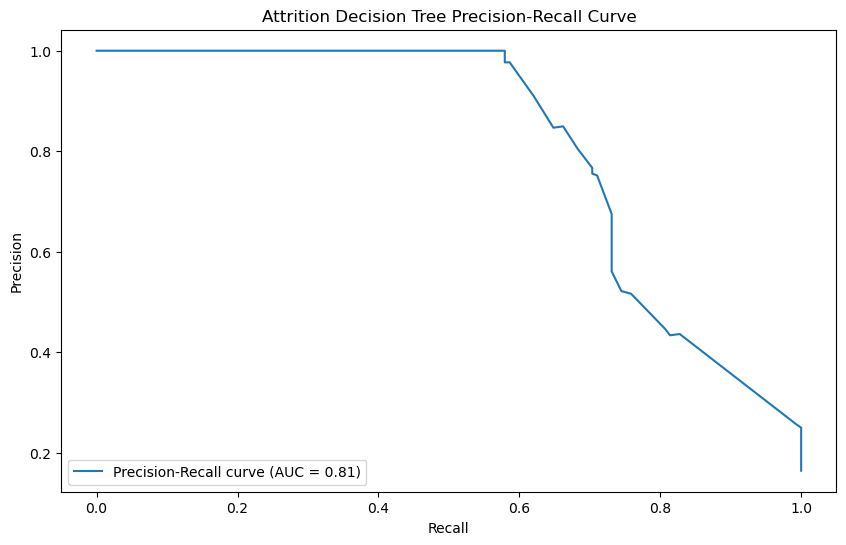

In [19]:
# Calculate probability of a true value (yes-attrition) being predicted.
# Extract the probability value (2nd value) from the array.
probabilities = hyper_dtc.predict_proba(features_test)[:, 1]

# Calculate precision and recall values and their corresponding thresholds.
precision, recall, thresholds = precision_recall_curve(target_test, probabilities)

# Calculate Area Under the Curve (AUC).
auc_score = auc(recall, precision)

# Plot Precision-Recall Curve.
# Include AUC score.
# Assign graph title and axis labels.
# Display the legend in the lower left corner.
# Display graph.
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Attrition Decision Tree Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

The flat line at the top of the Precision-Recall curve indicates that for low recall values, the model achieves almost perfect precision. This means that when the model makes predictions at these thresholds, it is correctly identifying the positive instances (yes to attrition) while making very few false positive predictions.

However, as the recall increases above 0.6, the precision starts to drop. This suggests that as the model tries to capture more of the positive instances in the dataset, it also starts to include more false positive predictions. The model becomes less conservative and more inclusive in its predictions, resulting in more false positive errors. (Steen, 2020)

<span style="font-size: 15px; font-weight: bold;">Decision Tree Plot</span><a id="Q1"></a>

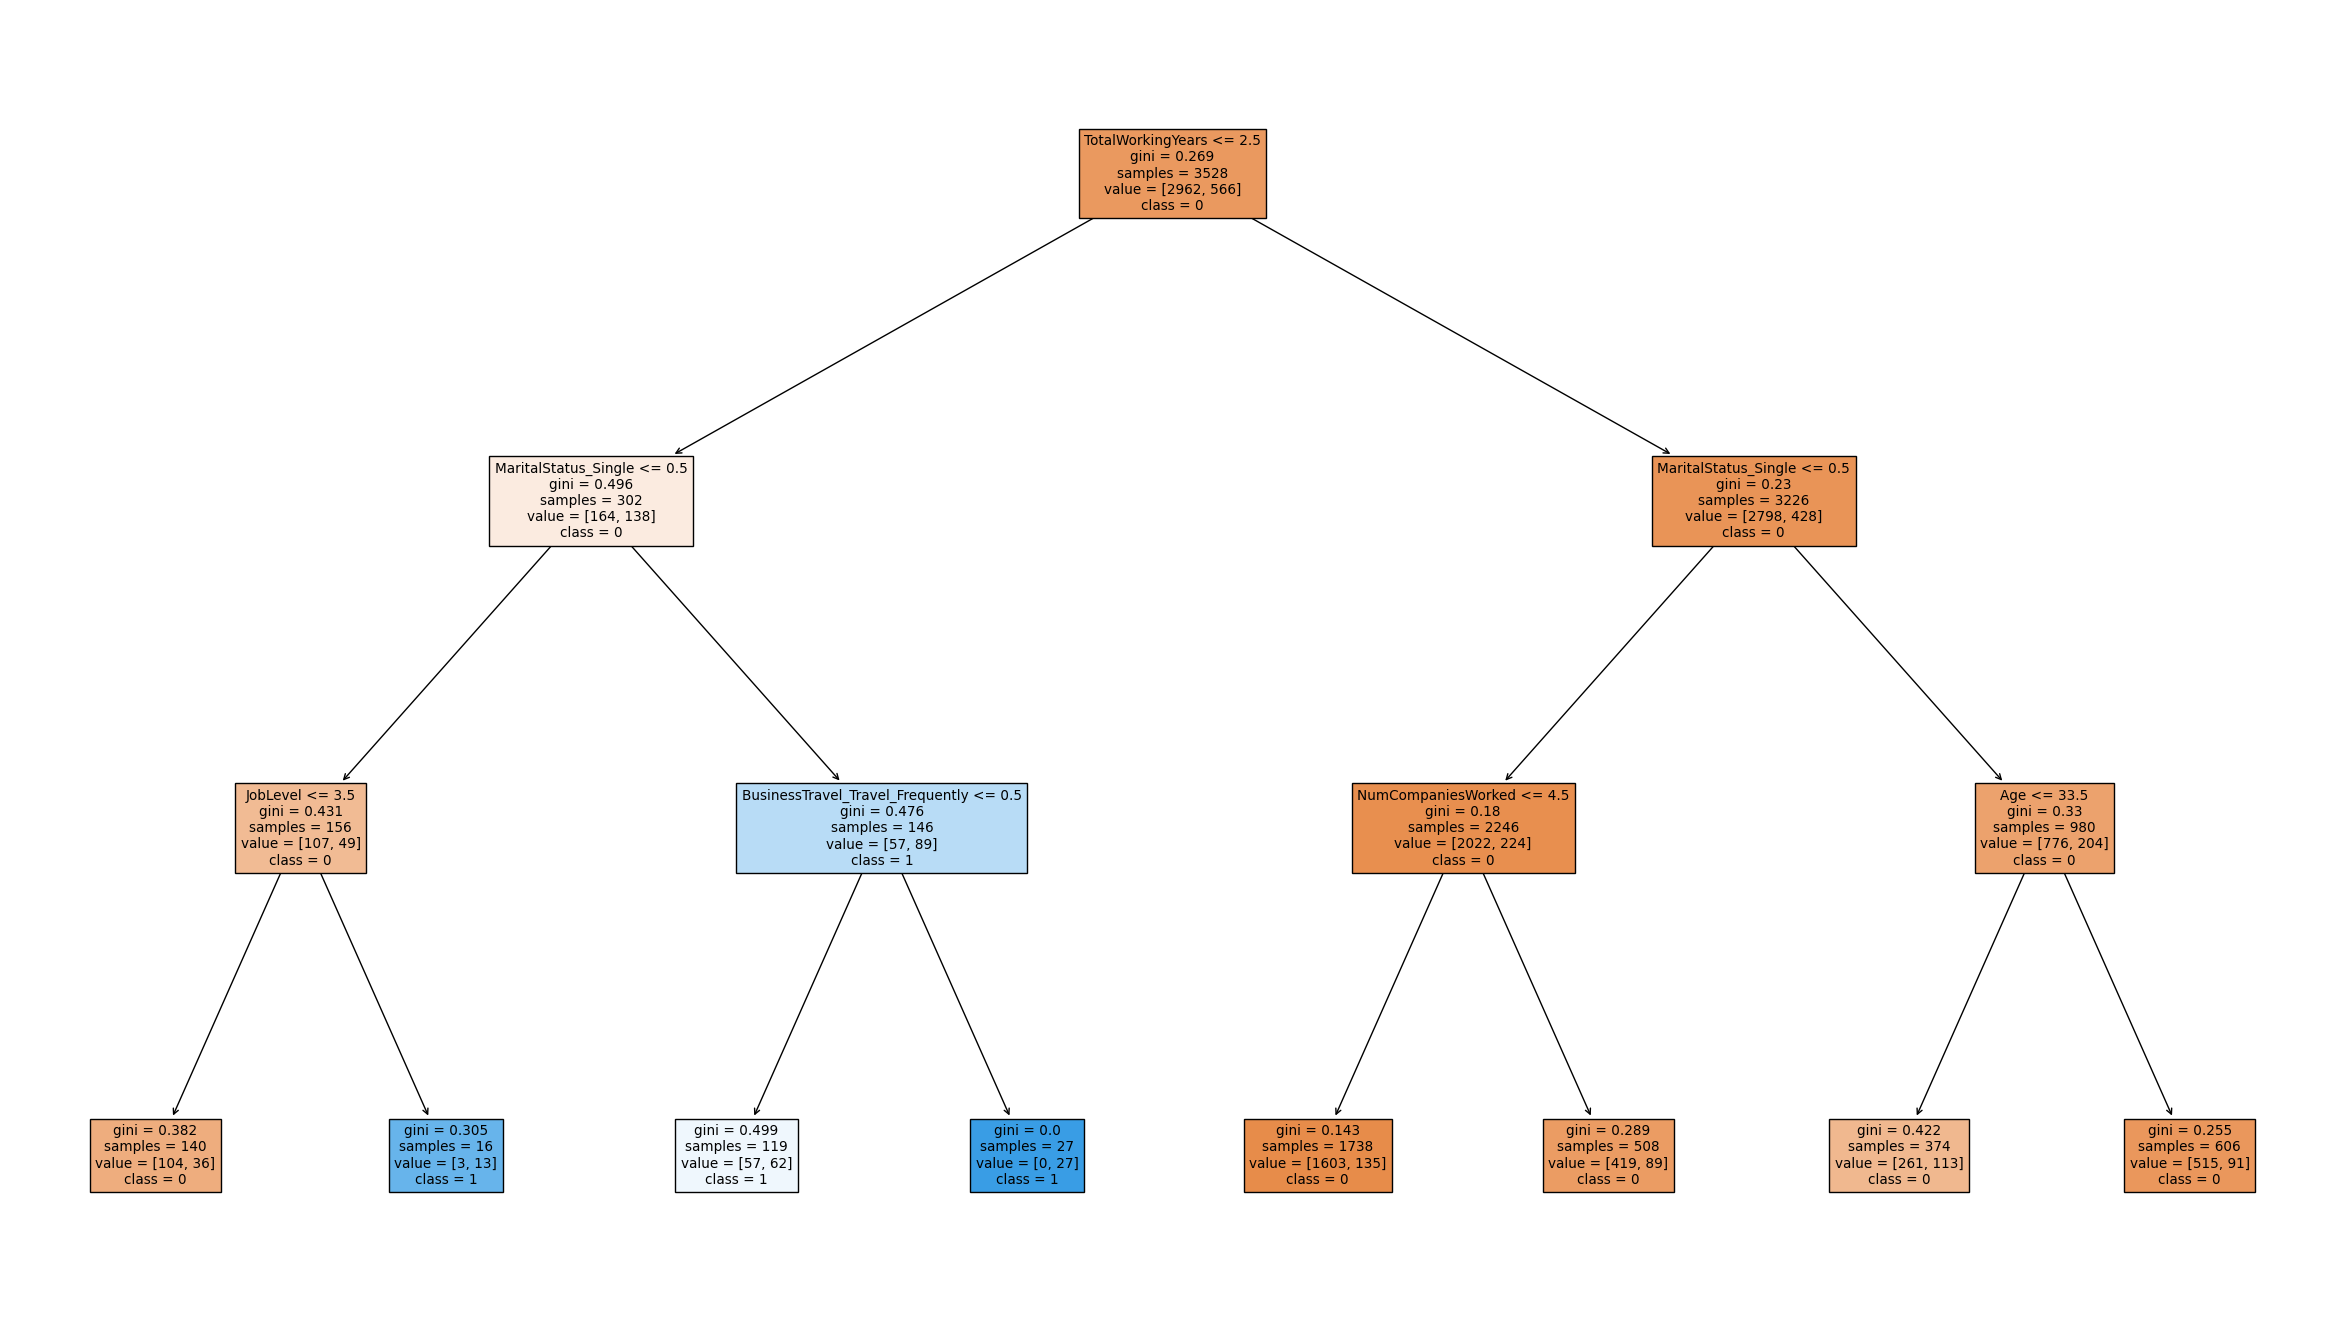

In [20]:
# The hypertuned model had a max depth of 10.
# This is great for calculations, but made the visualization very cramped and difficult to read.
# For the purpose of this visualization, I will initiate and fit a model with a max depth of 3.
viz_dtc = DecisionTreeClassifier(max_depth=3)
viz_dtc.fit(features_train, target_train)

# Increase size of tree as there are many branches.
# Fill the color.
# Assign column names of features variable to be the feature names.
# Assign "0" (no attrition) and "1" (attrition) as class names.
plt.figure(figsize=(30, 17))
plot_tree(viz_dtc, filled=True, feature_names=features.columns, class_names=['0', '1'])

# Show decision tree.
plt.show()

This tree is a visualization of the behind-the-scenes reasoning that occurs when the Decision Tree deploys its model. The hyper-tuned Decision Tree has a depth of 10 which results in multiple branches and nodes that clutter the visualization. Therefore, I have trained a model with a depth of 3 to provide an example of the logic a decision tree performs to complete its classification.

<span style="font-size: 18px; font-weight: bold;">Feature Importance</span><a id="Features"></a>

In [21]:
# Extract feature importances from hypertuned model.
feat_import = hyper_dtc.feature_importances_

# Get a record of the feature names by getting the name of the cols
# in the dummy df minus the target variable.
feat_names = dummy_df.drop(['Attrition'], axis=1).columns

# Zip (partner) each feature name with its importance score
# and store in a dictionary.
feat_impact = dict(zip(feat_names, feat_import))

# Sort feat_impact in descending order by the by the 2nd element
# in each pairing (importance score).
feat_impact = sorted(feat_impact.items(), key=lambda x: x[1], reverse=True)

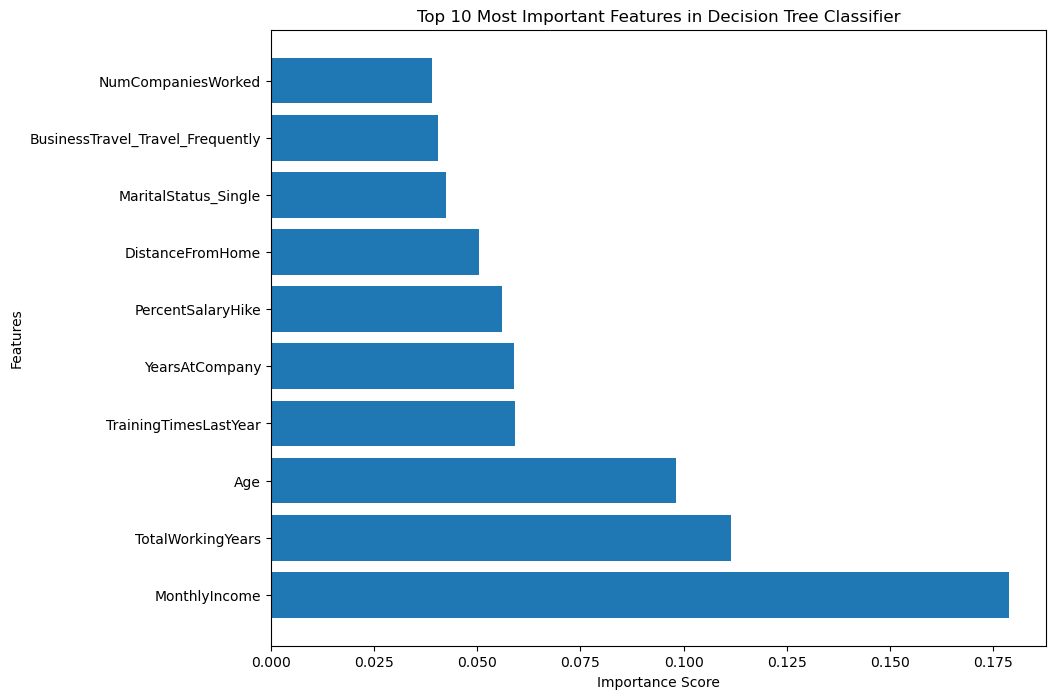

In [22]:
# Extract features and their importances from feat_impact
# and make separate list for both
# so they can each be graphed on their own axis.
feat_list = [item[0] for item in feat_impact]
import_list = [item[1] for item in feat_impact]

# Isolate the 10 features with the most importance.
top_feat_list = feat_list[:10]
top_import_list = import_list[:10]

# Create bar graph showing each feature
# and their importance in the hyper_rfr model.
# Increase figure size for ease of viewing.
# Graph feat_list on y-axis and import_list on x-axis.
#Assign graph title and axis labels.
# Display graph.
plt.figure(figsize=(10, 8))
plt.barh(top_feat_list, top_import_list)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features in Decision Tree Classifier')
plt.show()

<span style="font-size: 18px; font-weight: bold;">Questions</span><a id="Questions"></a>

<span style="font-size: 15px; font-weight: bold;">Question #1: What Department has the highest attrition rate?</span><a id="Q1"></a>

In [23]:
# Group the dataframe by "Department" column and use temporary lambda function to find the mean attrition per department.
dept_att_rates = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Rename "Attrition" in new df to be titled "Attrition_Rate".
dept_att_rates = dept_att_rates.rename(columns={'Attrition': 'Attrition_Rate'})

# Display table showing attrition rate by department.
print(dept_att_rates)

               Department  Attrition_Rate
0         Human Resources        0.301587
1  Research & Development        0.157128
2                   Sales        0.150224


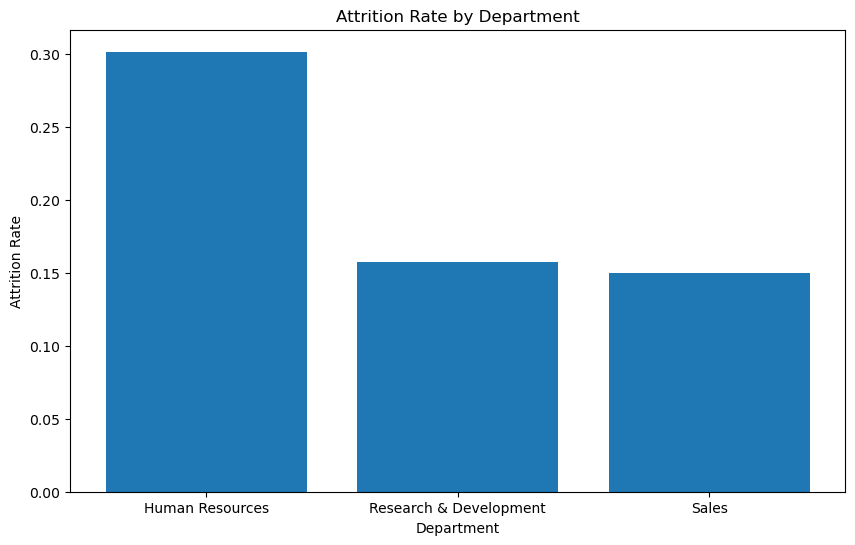

In [24]:
# Create bar graph showing the rate of attrition for each department.
# Increase figure size for ease of viewing.
# Assign graph title and axis labels.
# Display graph.
plt.figure(figsize=(10, 6))
plt.bar(dept_att_rates['Department'], dept_att_rates['Attrition_Rate'])
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Department')
plt.show()

Human Resources has almost double the rate of attrition as the other two departments in the dataset.

<span style="font-size: 15px; font-weight: bold;">Question #2: What Job Role has the highest attrition rate?</span><a id="Q1"></a>

In [25]:
# Group the dataframe by "Department" column and use temporary lambda function to find the mean attrition per job role.
role_att_rates = df.groupby('JobRole')['Attrition'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Rename "Attrition" in new df to be titled "Attrition_Rate".
role_att_rates = role_att_rates.rename(columns={'Attrition': 'Attrition_Rate'})

# Display table showing attrition rate by department.
print(role_att_rates)

                     JobRole  Attrition_Rate
0  Healthcare Representative        0.145038
1            Human Resources        0.134615
2      Laboratory Technician        0.162162
3                    Manager        0.137255
4     Manufacturing Director        0.110345
5          Research Director        0.237500
6         Research Scientist        0.181507
7            Sales Executive        0.168712
8       Sales Representative        0.144578


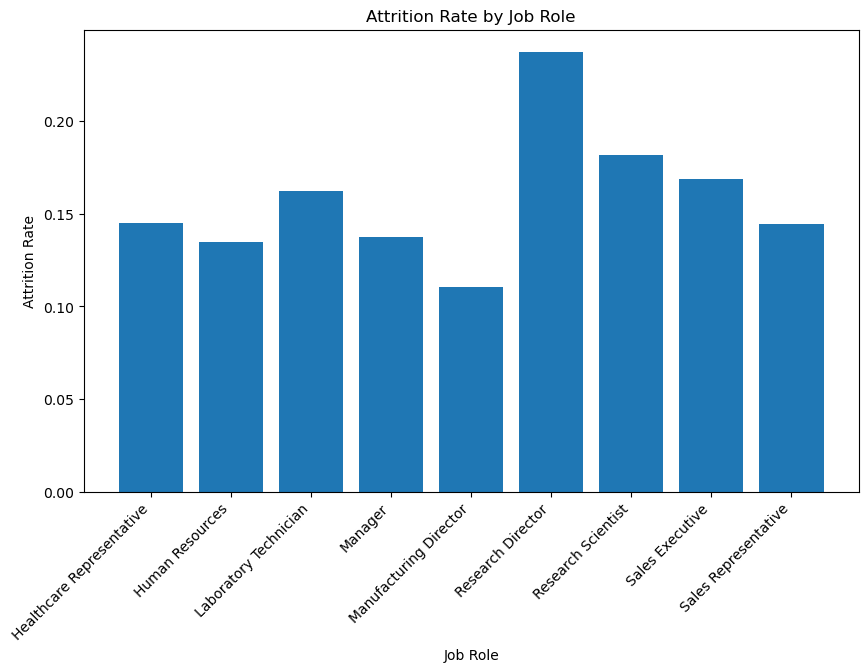

In [26]:
# Create bar graph showing the rate of attrition for each job role.
# Increase figure size for ease of viewing.
# Assign graph title and axis labels.
# Rotate axis labels for ease of viewing.
# Specify label alignment because otherwise they were drifting to the right.
# Display graph.
plt.figure(figsize=(10, 6))
plt.bar(role_att_rates['JobRole'], role_att_rates['Attrition_Rate'])
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Job Role')
plt.xticks(rotation=45, ha='right') 
plt.show()

Most Job Roles have between a .13 and a .18 rate of attrition.  However, Manufacturing Director has the lowest rate of attrition at .11 and Research Director has the highest rate of attrition at .24.

<span style="font-size: 15px; font-weight: bold;">Question #3: Do certain Job Levels attrite more than others?</span><a id="Q1"></a>

In [27]:
# Group the dataframe by "Department" column and use temporary lambda function to find the mean attrition per job level.
level_att_rates = df.groupby('JobLevel')['Attrition'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Rename "Attrition" in new df to be titled "Attrition_Rate".
level_att_rates = level_att_rates.rename(columns={'Attrition': 'Attrition_Rate'})

# Display table showing attrition rate by department.
print(level_att_rates)

   JobLevel  Attrition_Rate
0         1        0.154696
1         2        0.177903
2         3        0.146789
3         4        0.160377
4         5        0.130435


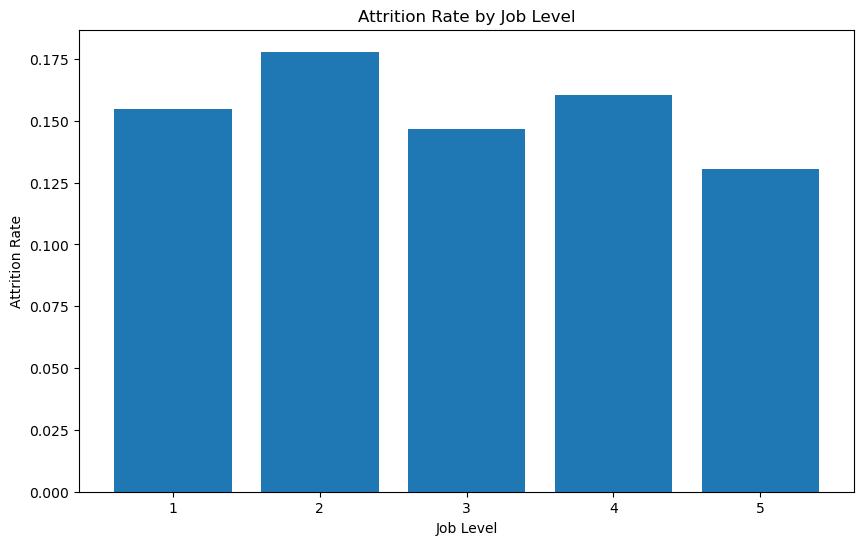

In [28]:
# Create bar graph showing the rate of attrition for each job level.
# Increase figure size for ease of viewing.
# Assign graph title and axis labels.
# Display graph.
plt.figure(figsize=(10, 6))
plt.bar(level_att_rates['JobLevel'], level_att_rates['Attrition_Rate'])
plt.xlabel('Job Level')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Job Level')
plt.show()

Most Job Levels have between a .14 and a .16 rate of attrition.  However, Job Level 5 has the lowest rate of attrition at .13 and Job Level 2 has the highest rate of attrition at .18.

<span style="font-size: 15px; font-weight: bold;">Question #4: Does more training time lead to attrition or less training time?</span><a id="Q1"></a>

In [29]:
# Group the dataframe by "Department" column and use temporary lambda function to find the mean attrition per training time.
train_att_rates = df.groupby('TrainingTimesLastYear')['Attrition'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Rename "Attrition" in new df to be titled "Attrition_Rate".
train_att_rates = train_att_rates.rename(columns={'Attrition': 'Attrition_Rate'})

# Display table showing attrition rate by department.
print(train_att_rates)

   TrainingTimesLastYear  Attrition_Rate
0                      0        0.185185
1                      1        0.140845
2                      2        0.171846
3                      3        0.175153
4                      4        0.130081
5                      5        0.142857
6                      6        0.061538


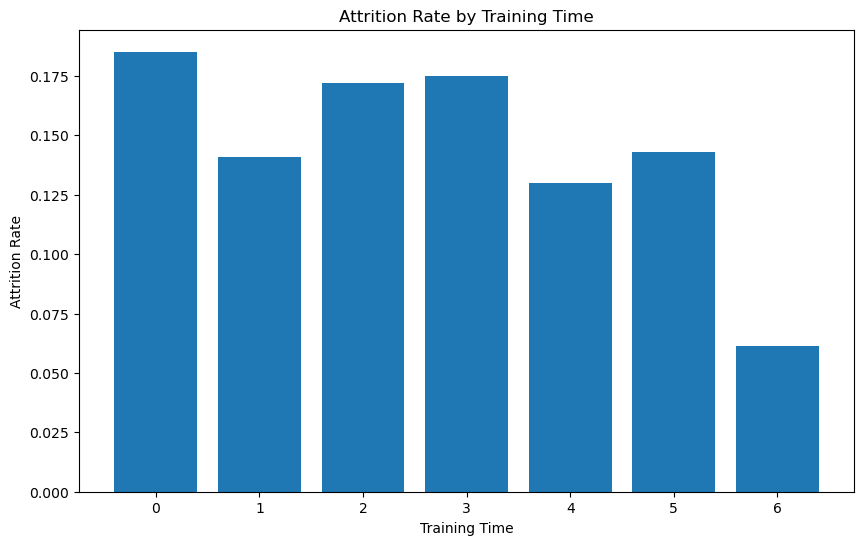

In [30]:
# Create bar graph showing the rate of attrition for each training time.
# Increase figure size for ease of viewing.
# Assign graph title and axis labels.
# Display graph.
plt.figure(figsize=(10, 6))
plt.bar(train_att_rates['TrainingTimesLastYear'], train_att_rates['Attrition_Rate'])
plt.xlabel('Training Time')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Training Time')
plt.show()

It appears that less training time leads to higher attrition.  The highest attrition rate has 0 training times and the lowest attrition rate has 6 training times.

<span style="font-size: 15px; font-weight: bold;">Question #5: Does a higher level of education lead to more or less attrition?</span><a id="Q1"></a>

In [31]:
# Group the dataframe by "Department" column and use temporary lambda function to find the mean attrition each level of education.
edu_att_rates = df.groupby('Education')['Attrition'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Rename "Attrition" in new df to be titled "Attrition_Rate".
edu_att_rates = edu_att_rates.rename(columns={'Attrition': 'Attrition_Rate'})

# Display table showing attrition rate by department.
print(edu_att_rates)

   Education  Attrition_Rate
0          1        0.152941
1          2        0.187943
2          3        0.155594
3          4        0.155779
4          5        0.145833


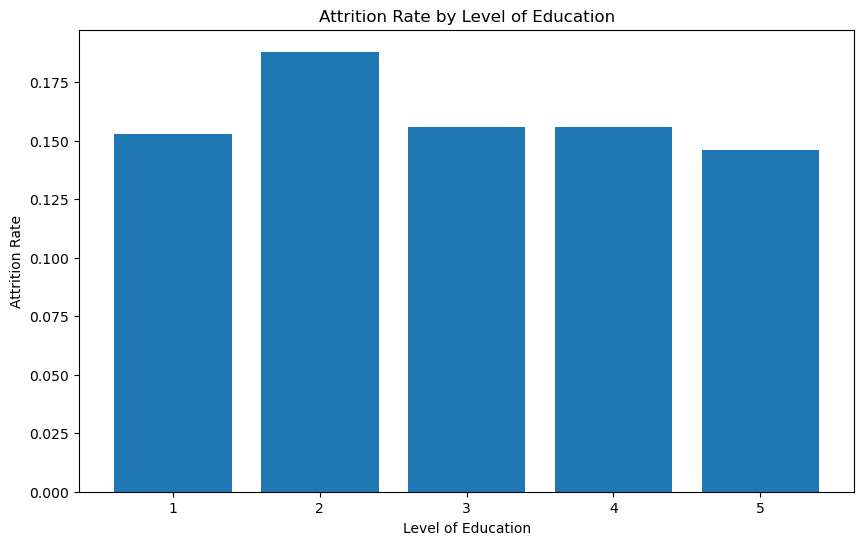

In [32]:
# Create bar graph showing the rate of attrition for each level of education.
# Increase figure size for ease of viewing.
# Assign graph title and axis labels.
# Display graph.
plt.figure(figsize=(10, 6))
plt.bar(edu_att_rates['Education'], edu_att_rates['Attrition_Rate'])
plt.xlabel('Level of Education')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Level of Education')
plt.show()

The attrition rates across the different levels of education are pretty steady with the exception of a small spike in attrition for the 2nd level of education.

<span style="font-size: 15px; font-weight: bold;">Question #6: Does more travel lead to attrition or less travel?</span><a id="Q1"></a>

In [33]:
# Group the dataframe by "Department" column and use temporary lambda function to find the mean attrition per travel category.
travel_att_rates = df.groupby('BusinessTravel')['Attrition'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Rename "Attrition" in new df to be titled "Attrition_Rate".
travel_att_rates = travel_att_rates.rename(columns={'Attrition': 'Attrition_Rate'})

# Display table showing attrition rate by department.
print(travel_att_rates)

      BusinessTravel  Attrition_Rate
0         Non-Travel        0.080000
1  Travel_Frequently        0.249097
2      Travel_Rarely        0.149569


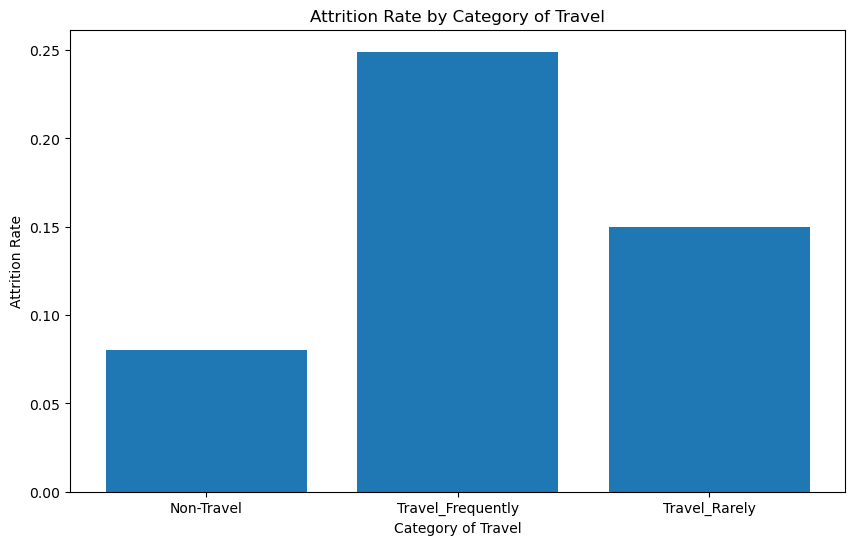

In [34]:
# Create bar graph showing the rate of attrition for each category of travel.
# Increase figure size for ease of viewing.
# Assign graph title and axis labels.
# Display graph.
plt.figure(figsize=(10, 6))
plt.bar(travel_att_rates['BusinessTravel'], travel_att_rates['Attrition_Rate'])
plt.xlabel('Category of Travel')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Category of Travel')
plt.show()

 More travel leads to higher attrition. The attrition level of those who travel frequently is almost double the attrition level of those who don't travel at all.

<span style="font-size: 15px; font-weight: bold;">Question #7: Is there a Monthly Income where attrition plateaus?</span><a id="Q1"></a>

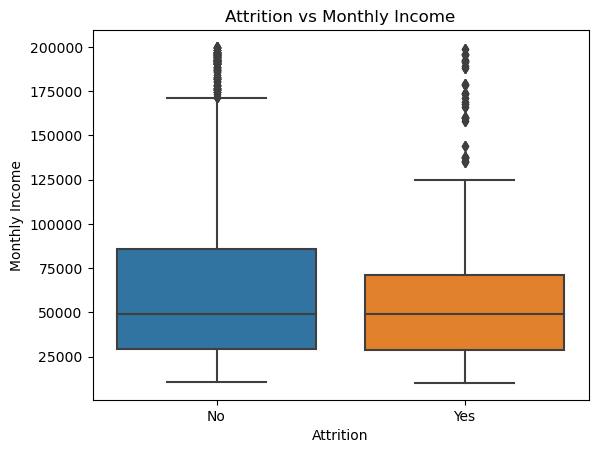

In [35]:
# Create boxplots of Attrition vs Monthly Income.
# Assign graph title and axis labels.
# Display graph.
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Attrition vs Monthly Income')
plt.ylabel('Monthly Income')
plt.show()

Both the "Yes" and "No" groups for attrition have a median income of roughly $50,000.  The group that did not attrite has a higher upper bound to the 3rd quartile, a higher range to the whiskers, and a clustering of high range outliers. It is difficult to say if there is a plateau, but it can be concluded that those with a higher monthly income are less likely to attrite.

<span style="font-size: 15px; font-weight: bold;">Question #8: How much has the attrition in the dataset cost the company?</span><a id="Q1"></a>

In [36]:
# Create a filtered df which only includes the "MonthlyIncome" col of the rows where the "Attrition" entry is 'Yes'.
cost = df[df['Attrition'] == 'Yes'][['MonthlyIncome']].copy()

# Create new "YearlyIncome" col.
cost['YearlyIncome'] = cost['MonthlyIncome'] * 12

# “One estimate places the cost to replace an employee at three to four times the position’s salary” (Wallace, 2023).
# Create new col titled "AttritionCost" which is 3.5 times the yearly salary.
cost['AttritionCost'] = cost['YearlyIncome'] * 3.5

# Sum the "AttritionCost" col.
total_attrition_cost = cost['AttritionCost'].sum()

# Display the total cost of attrition in the dataset.
print(f"Total Attrition Cost: ${total_attrition_cost:,.2f}")

Total Attrition Cost: $1,841,966,280.00


 “One estimate places the cost to replace an employee at three to four times the position’s salary” (Wallace, 2023).
 
To determine the cost of attrition in the dataset, I filtered the dataset to only show the entries for employees that had attrited. I then annualized the monthly income and multiplied the yearly income by 3.5 which is the mid point of the anticipated cost mentioned in the above quote. After summing the attrition cost column, it is determined that the attrition in the dataset had an estimated cost to the company of $1,841,966,280.00.

<span style="font-size: 15px; font-weight: bold;">Question #9: We have assumed that Age and Total Working Years are related. Can this be confirmed?</span><a id="Q1"></a>

In [37]:
# Calculate the correlation between "Age" and "TotalWorkingYears".
correlation = df['Age'].corr(df['TotalWorkingYears'])

# Display correlation coefficient.
print("Correlation coefficient between Age and Total Working Years:", correlation)

Correlation coefficient between Age and Total Working Years: 0.6784363473045059


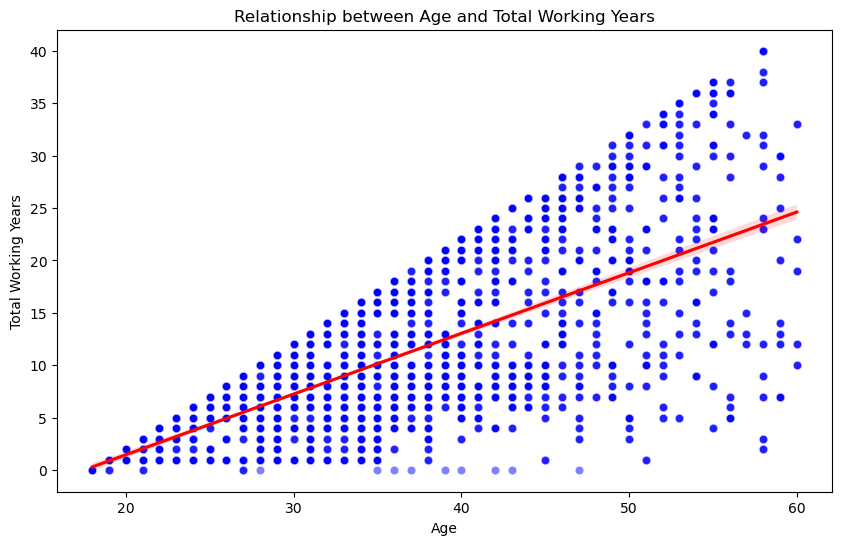

In [38]:
# Create scatterplot showing relationship between "Age" and "TotalWorkingYears".
# Increase size of plot for ease of viewing.
# Add regression line to plot.
# Assign graph title and axis labels.
# Display graph.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalWorkingYears', data=df, color='blue', alpha=0.5)
sns.regplot(x='Age', y='TotalWorkingYears', data=df, scatter=False, color='red')
plt.xlabel('Age')
plt.ylabel('Total Working Years')
plt.title('Relationship between Age and Total Working Years')
plt.show()


To find the relationship between Age and Total Working Years, I first found the correlation coefficient of the two variables. The .678 correlation indicates that both variables move together in the same direction. As Age increases, Total Working Years also increases and vice versa.

I then created a scatter plot of Age and Total Working Years and overlayed a regression line to illustrate the lose linear relationship that the variables have.

<span style="font-size: 15px; font-weight: bold;">Question #10: Can this model be run using only variables that the company has control over?</span><a id="Q1"></a>

In [39]:
# Create copy of original df where we will remove values that the business cannot control.
control_df = df

# Check for accuracy.
print(f"The shape of the prior dataframe was {current_shape}.")
print(f"The current shape of the dataframe is {control_df.shape}.")
current_shape = control_df.shape

The shape of the prior dataframe was (4410, 34).
The current shape of the dataframe is (4410, 20).


In [40]:
# Find the data type for each column.
control_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [41]:
# Drop fields that a company has no control over once an employee has been hired.
control_df.drop('Age', axis=1, inplace=True)
control_df.drop('Gender', axis=1, inplace=True)
control_df.drop('MaritalStatus', axis=1, inplace=True)
control_df.drop('Education', axis=1, inplace=True)
control_df.drop('EducationField', axis=1, inplace=True)
control_df.drop('NumCompaniesWorked', axis=1, inplace=True)
control_df.drop('TotalWorkingYears', axis=1, inplace=True)
control_df.drop('YearsAtCompany', axis=1, inplace=True)

# Check for accuracy.
print(f"The shape of the prior dataframe was {current_shape}.")
print(f"The current shape of the dataframe is {control_df.shape}.")
current_shape = control_df.shape

The shape of the prior dataframe was (4410, 20).
The current shape of the dataframe is (4410, 12).


In [42]:
# Isolate categorical columns. These are the columns that will require dummy variables.
control_dummy_cols = control_df.select_dtypes(include='object')

# Drop the Attrition Column.  This does not need to be a dummy variable as it will be the target variable.
control_dummy_cols = control_dummy_cols.drop("Attrition", axis=1)

# Create dummy variables of categorical columns minus Attrition.
# Use original categorical column names as prefixes for dummy variables.
# Use drop_first=True to drop the first dummy for each variable to prevent multicollinearity.
control_dummy_data = pd.get_dummies(control_dummy_cols, prefix=control_dummy_cols.columns, drop_first=True)

# Create dummy_df which is the original df minus the columns from which dummy variables were made.
control_dummy_df = control_df.drop(control_dummy_cols, axis=1)

# Concatenate (combine) original dataframe (minus categorical columns) with the categorical dummies dataframe along the columns.
control_dummy_df = pd.concat([control_dummy_df, control_dummy_data], axis=1)

# Check for accuracy.
print(f"The shape of the prior dataframe was {current_shape}.")
print(f"The current shape of the dataframe is {control_dummy_df.shape}.")
current_shape = control_dummy_df.shape

The shape of the prior dataframe was (4410, 12).
The current shape of the dataframe is (4410, 21).


In [43]:
# Convert "Attrition" column to a binary 1 for yes and 0 for no.
control_dummy_df['Attrition'] = control_dummy_df['Attrition'].replace({'Yes': 1, "No": 0})

# Assign feature and target variables.
features = control_dummy_df.drop('Attrition', axis=1)
target = control_dummy_df['Attrition']

# Split the variables into training and test sets using an 80/20 split
# and a random state of 42 for continuity.
cont_features_train, cont_features_test, cont_target_train, cont_target_test = \
    train_test_split(features, target, train_size=0.8, test_size=0.2,
                     random_state=0)

Yes. To accomplish this, you will need to drop the columns that the business has no control over, recreate the dummy variables, and concatenate the categorical dummy variables with the numerical variables in the dataframe. This dataframe can now be used to create features, target, testing, and training variables which can be used to select and fit a predictive model and make predictions.

<span style="font-size: 15px; font-weight: bold;">Question #10.5: Will the updated model have the same metrics? </span><a id="Q1"></a>

In [44]:
# Determine best model for data.

# Store model names and instance of models in tuple variable.
# Use random state = 42 for consistency when re-running the models.
# Selected models with the ability to work with classification and binary data.
models=[("Decision Tree", DecisionTreeClassifier(random_state=42)),
        ("K-Nearest Neighbors",KNeighborsClassifier()),
        ("Logistic Regression", LogisticRegression())]

# Use for loop to iterate through each name and model in tuple.
# Fit the models on training variables.
# Make predictions based on features_test variable.
# Print model name and metrics.
for name,model in models:
    model.fit(cont_features_train,cont_target_train)
    cont_predictions = model.predict(cont_features_test)
    print(f'Model: {name}')
    print(f'{classification_report(cont_target_test, cont_predictions)}\n')

Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       737
           1       0.98      1.00      0.99       145

    accuracy                           1.00       882
   macro avg       0.99      1.00      0.99       882
weighted avg       1.00      1.00      1.00       882


Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       737
           1       0.42      0.29      0.34       145

    accuracy                           0.82       882
   macro avg       0.65      0.61      0.62       882
weighted avg       0.80      0.82      0.80       882


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       737
           1       0.00      0.00      0.00       145

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       8

In [45]:
# Establish the parameters to be used in grid search.
# max_depth = Determines how deep the tree should go.
# min_samples_split = Indicates the min number of samples a node must have
# in order to be split.
# min_samples_leaf = Indicates min number each node must have.
cont_parameters = {'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# Initiate a grid search on the Decision Tree Classifier using the above parameters, 
# accuracy as the scoring metric, and 5 folds for cross validation.
cont_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), cont_parameters, cv=5, scoring='accuracy')

# Fit the above grid search on the training data.
cont_grid_search.fit(cont_features_train, cont_target_train)

# Print the best hyperparameters found in the above grid search.
print("Best Hyperparameters:", cont_grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [46]:
# Initiate a decision tree classifier model outside of loop with best parameters.
cont_hyper_dtc = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2)

# Fit the model to the training data.
cont_hyper_dtc.fit(cont_features_train, cont_target_train)

# Make predictions on the test data.
predictions = cont_hyper_dtc.predict(cont_features_test)

# Evaluate on test set
cont_test_accuracy = cont_hyper_dtc.score(cont_features_test, cont_target_test)
print(f'{classification_report(cont_target_test, cont_predictions)}')

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       737
           1       0.00      0.00      0.00       145

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.70      0.84      0.76       882



No, if the data changes the metrics will not be the same. First, you need to determine if the Decision Tree Classifier is still the best fit for the data. In this case, an original review shows that the Decision Tree Classifier still has very high classification metrics, but the hyper-tuned model shows a drop in accuracy from 93% to 84%. Many of the variables that were dropped because the business had no control over them were ranked in the top 10 most important features for the original Decision Tree Classifier model. Losing this data results in a loss of accuracy when predicting if an employee will attrite.

<span style="font-size: 18px; font-weight: bold;">Resources</span><a id="Resources"></a>

Brownlee, J. (2023, October 10). How to use ROC curves and precision-recall curves for classification in Python. MachineLearningMastery.com. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/ 

Kaggle. (2022, November 3). Employee attrition. Kaggle. https://www.kaggle.com/datasets/ajayganga/employee-attrition  

Kanstren, T. (2023, August 4). A look at precision, recall, and F1-score. Medium. https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec 

Steen, D. (2020, September 20). Precision-recall curves. Medium. https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248 

Wallace, L. (2023, March 21). Forbes EQ Brand Voice: Five hidden costs of employee attrition. Forbes. https://www.forbes.com/sites/forbeseq/2023/03/21/five-hidden-costs-of-employee-attrition/?sh=482ecd3562f4 